## Neural Network

In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

### Crear Datasets

In [2]:
n = 500 #numero de registros
p = 2 #numero de variables

# factor muestra que tan alejados estan un circulo del otro
# noise indica el ruido que se esta agregado a nuestros datos
x, y = make_circles(n_samples=n,factor=0.5, noise = 0.05) 
#el resultado de y es una serie y deseamos una matriz
y = y[:,np.newaxis]

print(x)

[[ 3.95288949e-01 -3.15366251e-01]
 [-5.17869681e-01  2.38936245e-02]
 [-3.71773607e-01  3.63264474e-01]
 [-3.06589433e-01 -4.47785002e-01]
 [ 1.07373086e+00 -1.04887198e-01]
 [-7.15067275e-01  6.73381378e-01]
 [ 9.00559255e-01 -3.93562894e-01]
 [ 1.55458590e-01 -5.31336395e-01]
 [-1.30764182e-01 -9.88220791e-01]
 [ 4.10874920e-01  1.90963827e-01]
 [ 3.57371381e-01 -3.27394584e-01]
 [ 5.21827330e-02 -5.04373924e-01]
 [ 5.05699752e-01  8.46470042e-02]
 [-1.01792052e+00 -2.89498878e-01]
 [-8.63318691e-01 -3.66425822e-01]
 [ 4.59397509e-01 -1.30625044e-01]
 [-5.09114971e-01  1.90965756e-01]
 [ 3.55156549e-01 -3.70390271e-01]
 [-7.05778363e-01 -7.07258568e-01]
 [ 1.06121415e+00 -2.29378801e-01]
 [-8.50256710e-01  5.37406077e-01]
 [-7.37054874e-01  7.13547126e-01]
 [-3.58159421e-01 -3.14196409e-01]
 [-1.00679273e+00  6.46548625e-02]
 [ 5.01018613e-01  8.98553221e-01]
 [-8.40824047e-01  4.65322188e-01]
 [-5.34322477e-01  2.47173186e-01]
 [-9.58117078e-01 -3.15339692e-01]
 [-9.36554369e-01  3

In [3]:
print(y)

[[1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]


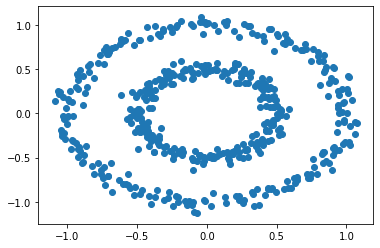

In [4]:
plt.scatter(x[:,0],x[:,1])
plt.show()

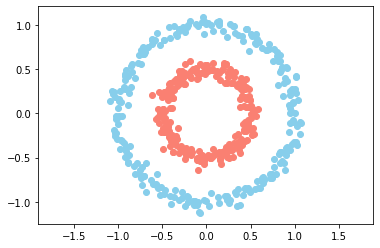

In [5]:
# Mostrar solo si y = 0
plt.scatter(x[y[:,0] == 0,0],x[y[:,0] == 0,1], c = "skyblue")
# Mostrar solo si y = 1
plt.scatter(x[y[:,0] == 1,0],x[y[:,0] == 1,1], c = "salmon")
plt.axis("equal") #visualiza los ejes con la misma proporción
plt.show()

In [6]:
class neural_layer():
    #n_conn:número de conexiones que entran en nuestra capa de la capa anterior
    #n_neur: número de neuronas en la capa
    #act_f:función de activación para las neuronas de esta capa
    def __init__(self, n_conn, n_neur, act_f):
        self.act_f = act_f
        self.b = np.random.rand(1, n_neur) * 2 - 1
        self.w = np.random.rand(n_conn, n_neur) * 2 - 1

### Funciones de Activación

In [7]:
# Función anónima (lambda x)
sigm = (lambda x: 1 / (1 + np.e ** (-x)), #Función Sigmoide
        lambda x: x * (1 - x)) #Derivada de la Funcion Sigmoide
relu = lambda x: np.maximum(0,x)

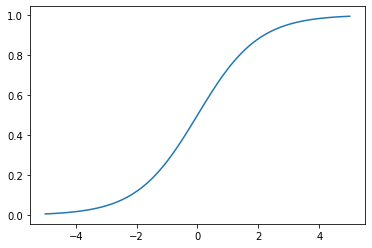

In [8]:
_x = np.linspace(-5,5,100)
#Función Sigmoide
plt.plot(_x,sigm[0](_x))

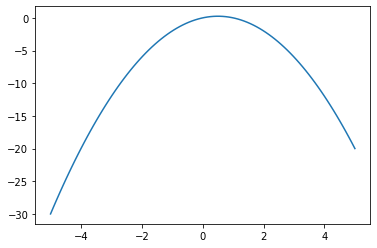

In [9]:
#Derivada de la función Sigmoide
plt.plot(_x,sigm[1](_x))

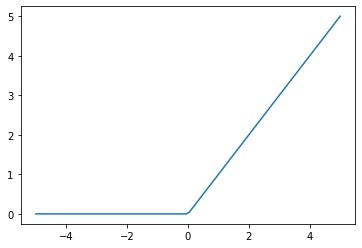

In [10]:
#Función Relu
plt.plot(_x,relu(_x))

### Creación de la Red Neuronal

In [11]:
#Esta una manera valida de crear capas pero se desea que sea iterativa
# l0 = neural_layer(p, 4, sigm)
# l1 = neural_layer(4, 8, sigm)
# ...

In [12]:
def create_nn(topology, act_f):
    nn = []
    for i, layer in enumerate(topology[:-1]):
        nn.append(neural_layer(topology[i], topology[i + 1], act_f))
    return nn

In [13]:
#topologia de la red, número de neuronas de la red por capa, la última capa es 1 porque el resultado que queremos es binario
#topology = [p, 4, 8, 16, 8, 4, 1]
topology = [p, 4, 8, 1]
#Función de coste, Error Cuadratico medio
l2_cost = (lambda yp, yr: np.mean((yp - yr) ** 2),
           lambda yp, yr: (yp - yr))
neural_net = create_nn(topology, sigm)

In [14]:
print(neural_net)

[<__main__.neural_layer object at 0x0000027B3A5CCC88>, <__main__.neural_layer object at 0x0000027B3A5CC608>, <__main__.neural_layer object at 0x0000027B3A5CCB88>]


### Función de Entrenamiento

In [15]:
def train(neural_net, x, y, l2_cost, lr = 0.5,train = True):
    out = [(None, x)]
    #Forward pass
    for l, layer in enumerate(neural_net):
        z = out[-1][1] @ neural_net[l].w + neural_net[l].b
        a = neural_net[l].act_f[0](z)
        out.append((z, a))
    #print(out[-1][1])
    #print(l2_cost[0](out[-1][1],y))
    #print(neural_net[l].w)
    if train:
        #Backward Pass
        deltas = []
        for i in reversed(range(0,len(neural_net))):
            z = out[i + 1][0]
            a = out[i + 1][1]

            #print(a.shape)
            if i == len(neural_net) - 1:
                #Calcular Delta Última Capa
                #Derivada de la Función de activacion en el punto de activacion de la neurona
                deltas.insert(0, l2_cost[1](a, y) * neural_net[i].act_f[1](a))
            else:
                #Calcular Delta respecto a la capa Previa
                #print(deltas[0].shape,_w.shape)
                deltas.insert(0, deltas[0] @ _w.T * neural_net[i].act_f[1](a))
            _w = neural_net[i].w

            #Gradient Descent
            neural_net[i].b = neural_net[i].b - np.mean(deltas[0], axis=0, keepdims=True) * lr   
            neural_net[i].w = neural_net[i].w - out[i][1].T @ deltas[0] * lr

    return out[-1][1]
train(neural_net, x, y, l2_cost, 0.5)
print("")#para que no se muestre el resultado XD

### Visualización y Test

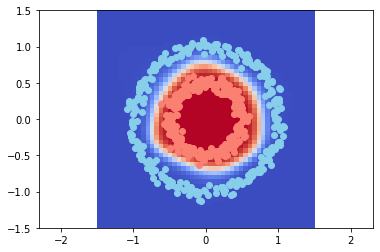

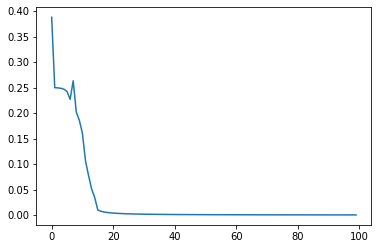

In [16]:
import time
from IPython.display import clear_output

neural_n = create_nn(topology, sigm)

loss = []

for i in range(2500):
    
  # Entrenemos a la red!
  py = train(neural_n, x, y, l2_cost, lr=0.05)
  
  if i % 25 == 0:
    
    print(py)
  
    loss.append(l2_cost[0](py, y))
  
    res = 50

    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)

    _y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _y[i0, i1] = train(neural_n, np.array([[x0, x1]]), y, l2_cost, train=False)[0][0]    

    plt.pcolormesh(_x0, _x1,_y, cmap="coolwarm")
    plt.axis("equal")

    plt.scatter(x[y[:,0] == 0, 0], x[y[:,0] == 0, 1], c="skyblue")
    plt.scatter(x[y[:,0] == 1, 0], x[y[:,0] == 1, 1], c="salmon")

    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.5)  